In [ ]:
# Question: Predicting Employee Attrition Prediction.You will have to create a model to predict Left. Identify the model with the best params. Target Column - Left.

### Data Analysis

In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("C:\\Users\\Ankita\\OneDrive\\Desktop\\Data\\HR_comma_sep.csv.txt")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [152]:
df.shape

(14999, 10)

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [62]:
df.isnull().sum()     

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [3]:
df.duplicated().sum()   

3008

In [8]:
df.loc[df.duplicated(keep = 'first'), :]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df.drop_duplicates(keep = 'first', inplace = True)

In [12]:
df.duplicated().sum()

0

In [21]:
df['sales'].value_counts()

sales
0    3239
1    2244
2    1821
3     976
4     694
5     686
6     673
7     621
8     601
9     436
Name: count, dtype: int64

In [105]:
sales_encoder= {'sales' : 0, 'technical' : 1, 'support' : 2, 'IT' : 3, 'RandD' : 4, 'product_mng' : 5, 'marketing' : 6, 'accounting' : 7, 'hr' : 8, 'management' : 9}
df['sales'] = df['sales'].map(sales_encoder)

In [23]:
df['salary'].value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

In [106]:
salary_encoder= {'low' : 0, 'medium' : 1, 'high' : 2}
df['salary'] = df['salary'].map(salary_encoder)

In [107]:
pd.get_dummies(df, columns = ['sales','salary'], dtype = int)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_0,sales_1,...,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,salary_0,salary_1,salary_2
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,NaN,NaN
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,NaN,NaN
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,NaN,NaN
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,NaN,NaN
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,NaN,NaN
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,NaN,NaN
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,NaN,NaN
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,NaN,NaN
sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data visualization

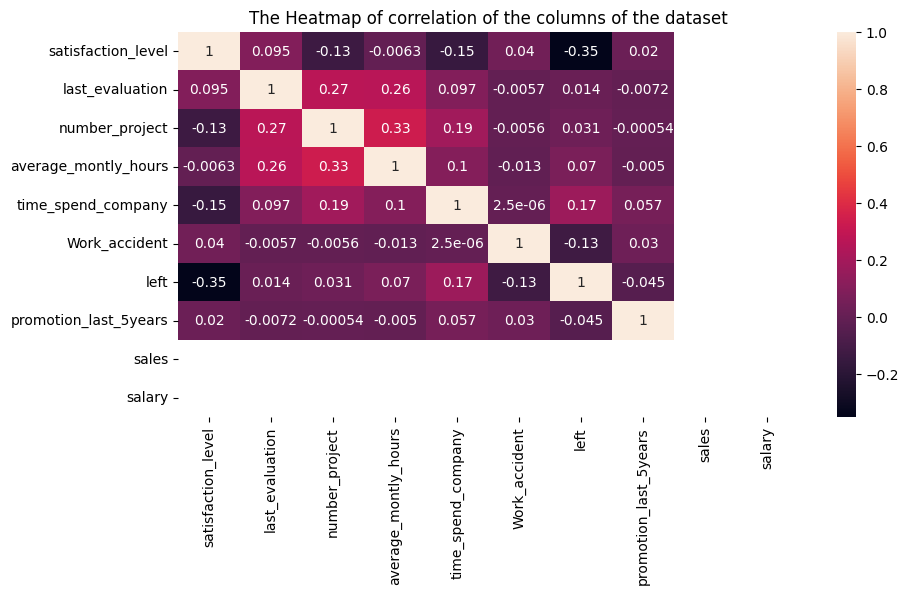

In [35]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title("The Heatmap of correlation of the columns of the dataset")
plt.show()

In [5]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

<Axes: xlabel='left'>

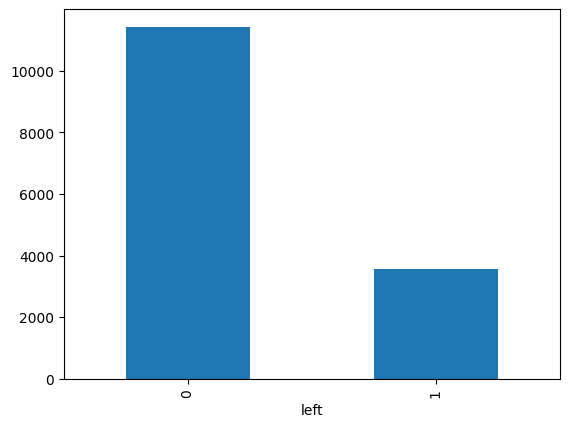

In [12]:
df['left'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

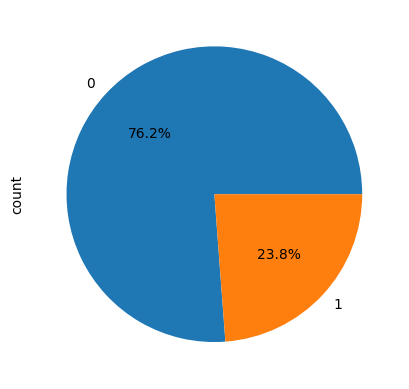

In [13]:
df['left'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [62]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

<Axes: xlabel='salary'>

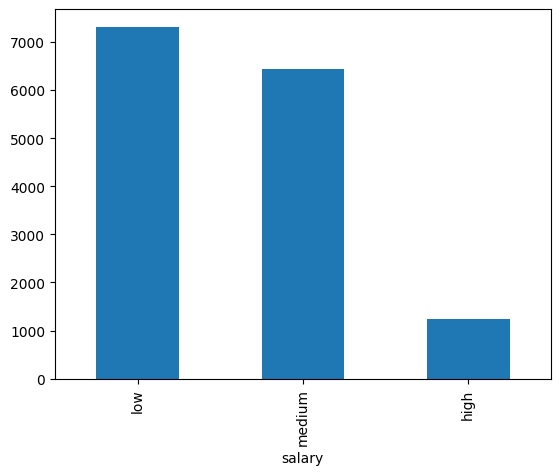

In [66]:
df['salary'].value_counts().plot(kind = 'bar')

(array([0, 1, 2]),
 [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

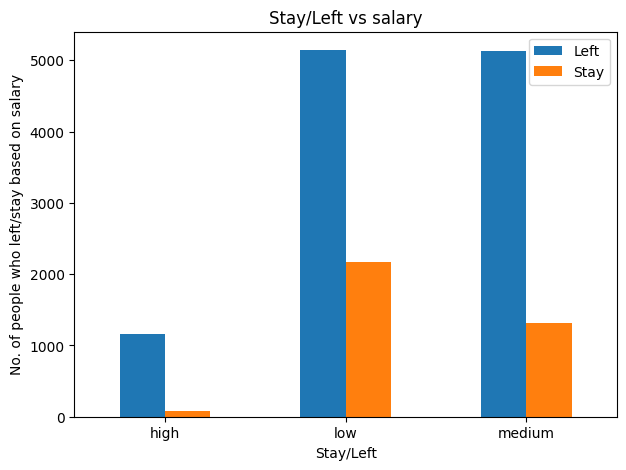

In [64]:
pd.crosstab(df['salary'], df['left']).plot(kind="bar",figsize=(7,5))
plt.title("Stay/Left vs salary")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on salary")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<Axes: xlabel='promotion_last_5years'>

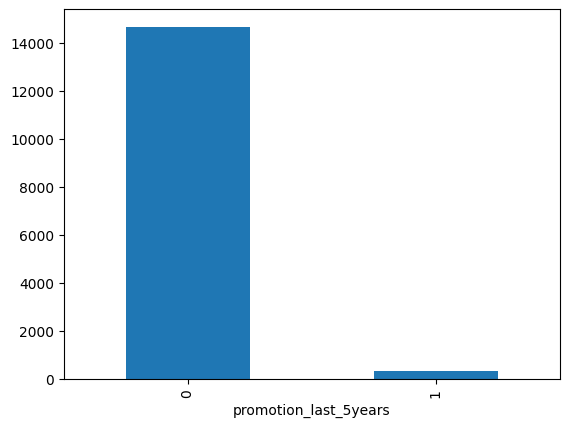

In [14]:
df['promotion_last_5years'].value_counts().plot(kind = 'bar')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

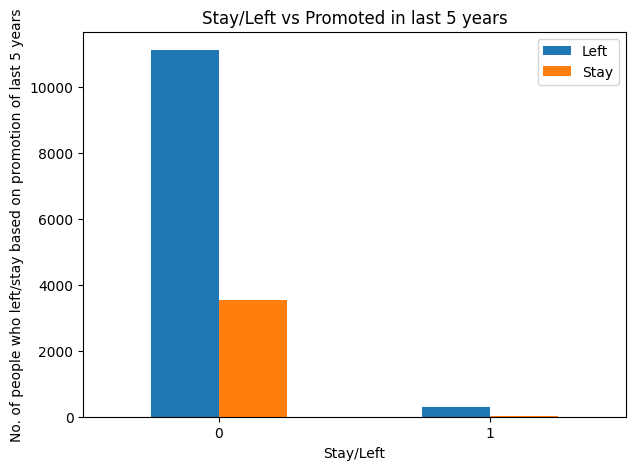

In [27]:
pd.crosstab(df['promotion_last_5years'], df['left']).plot(kind="bar",figsize=(7,5))
plt.title("Stay/Left vs Promoted in last 5 years")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on promotion of last 5 years")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<Axes: xlabel='Work_accident'>

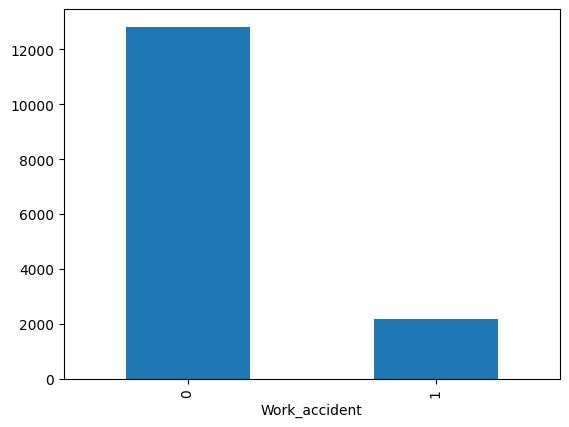

In [31]:
df['Work_accident'].value_counts().plot(kind = 'bar') 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

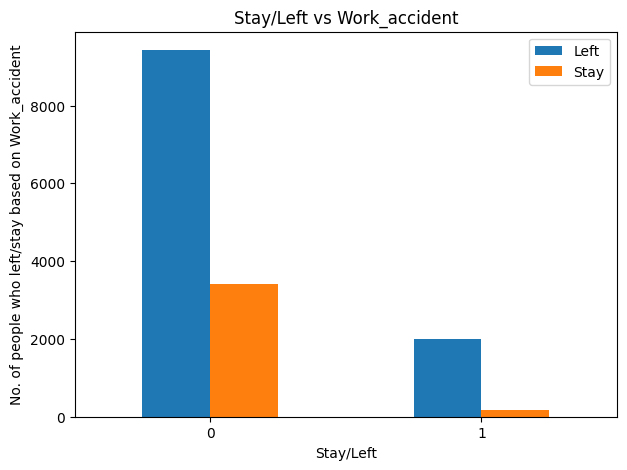

In [67]:
pd.crosstab(df['Work_accident'], df['left']).plot(kind="bar",figsize=(7,5))
plt.title("Stay/Left vs Work_accident")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on Work_accident")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<Axes: xlabel='time_spend_company'>

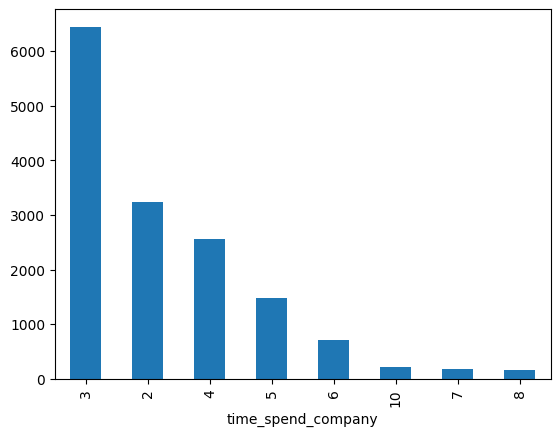

In [36]:
df['time_spend_company'].value_counts().plot(kind = 'bar')               

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '10')])

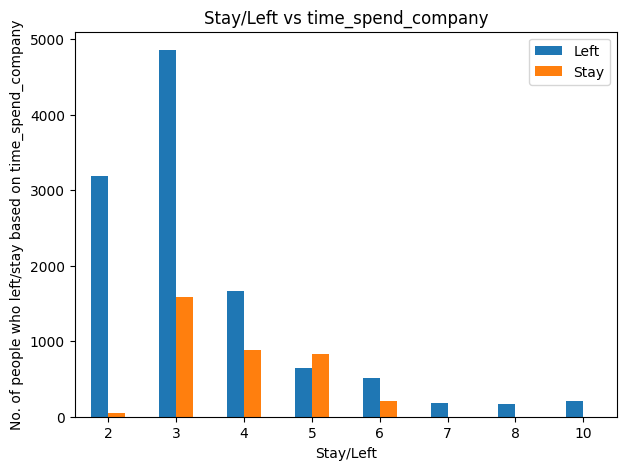

In [68]:
pd.crosstab(df['time_spend_company'], df['left']).plot(kind="bar",figsize=(7,5))
plt.title("Stay/Left vs time_spend_company")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on time_spend_company")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [40]:
df['number_project'].value_counts()            

number_project
4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: count, dtype: int64

<Axes: xlabel='number_project'>

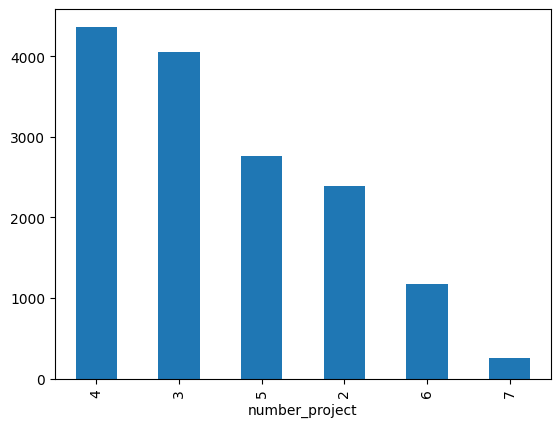

In [39]:
df['number_project'].value_counts().plot(kind = 'bar')               

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7')])

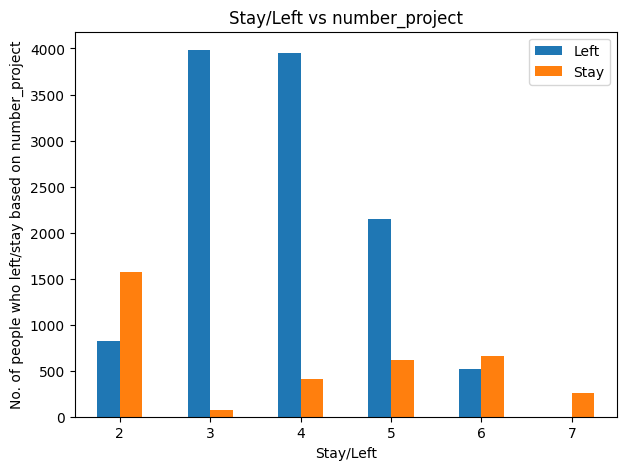

In [69]:
pd.crosstab(df['number_project'], df['left']).plot(kind="bar",figsize=(7,5))
plt.title("Stay/Left vs number_project")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on number_project")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

In [42]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

<Axes: xlabel='sales'>

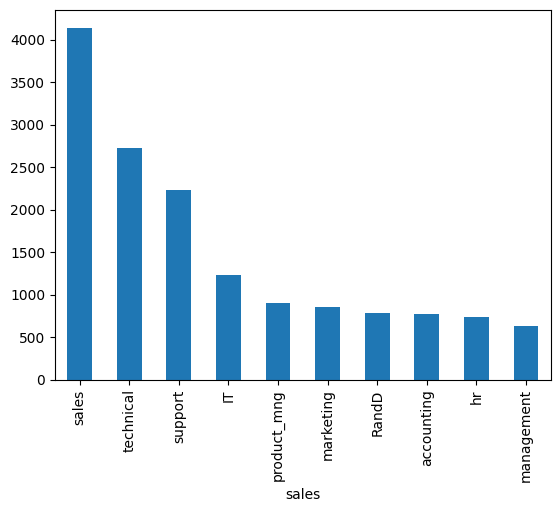

In [44]:
df['sales'].value_counts().plot(kind = 'bar')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

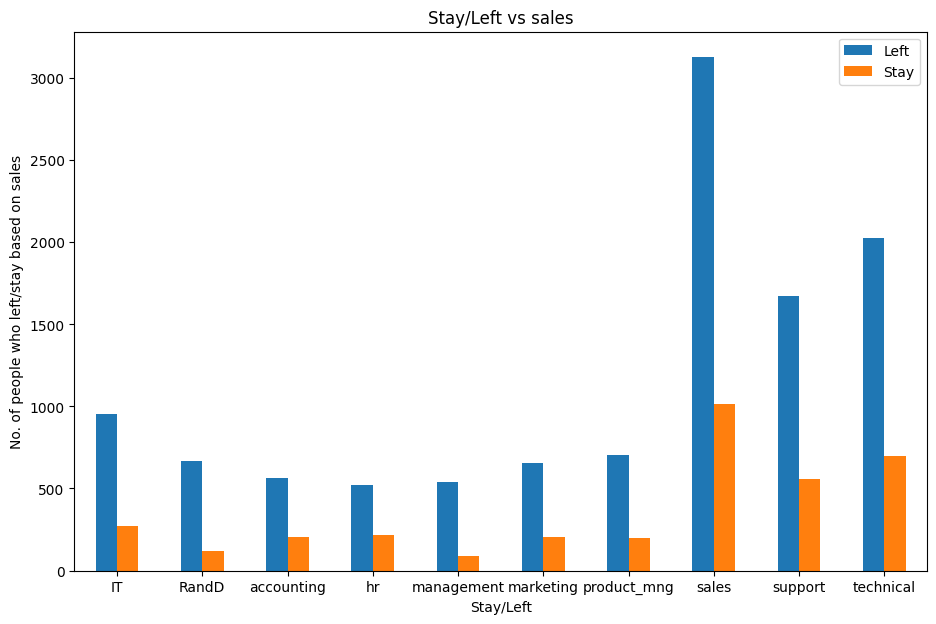

In [70]:
pd.crosstab(df['sales'], df['left']).plot(kind="bar",figsize=(11,7))
plt.title("Stay/Left vs sales")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on sales")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

<Axes: xlabel='satisfaction_level', ylabel='Count'>

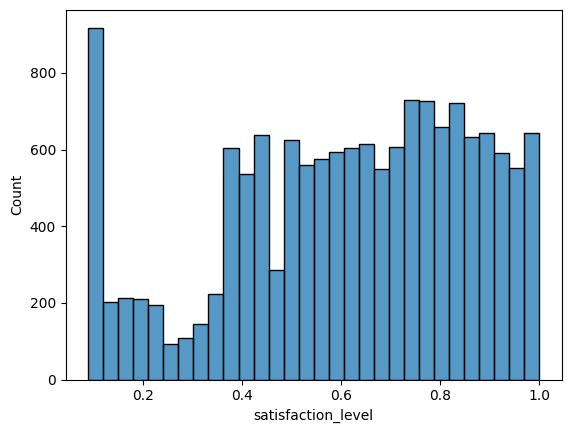

In [76]:
sns.histplot(data = df, x = 'satisfaction_level')

C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


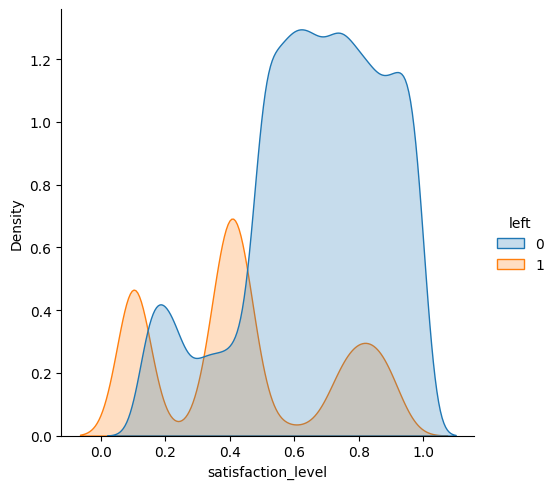

In [84]:
sns.displot(data = df, x = 'satisfaction_level', kind = 'kde', hue = 'left', fill = True)

<Axes: xlabel='last_evaluation', ylabel='Count'>

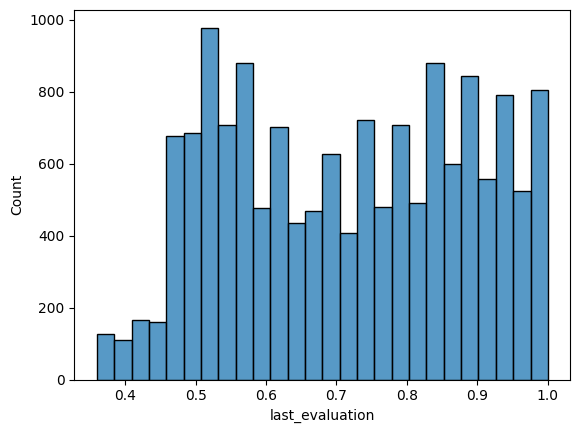

In [82]:
sns.histplot(data = df, x = 'last_evaluation')

C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


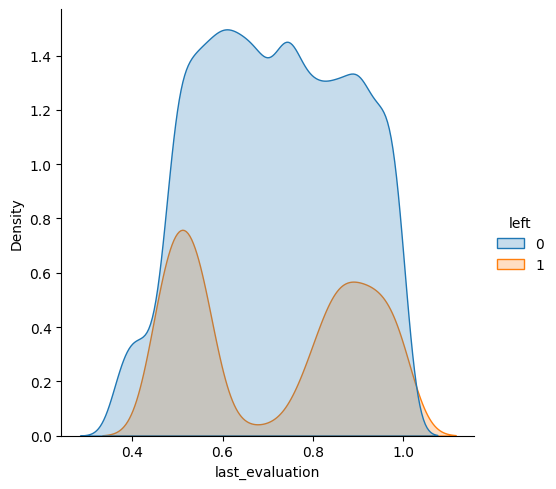

In [89]:
sns.displot(data = df, x = 'last_evaluation', kind = 'kde', hue = 'left', fill = True)

C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


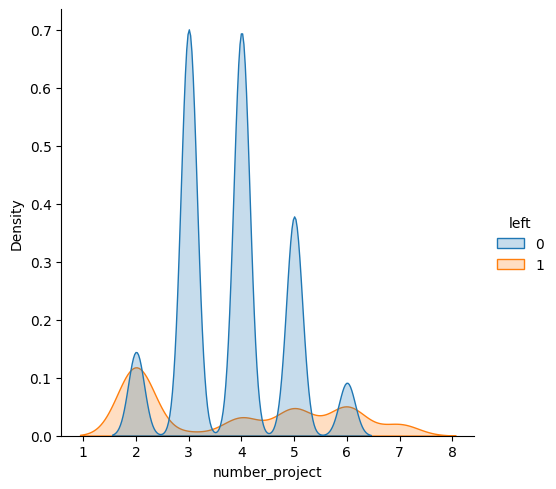

In [90]:
sns.displot(data = df, x = 'number_project', kind = 'kde', hue = 'left', fill = True)

<Axes: xlabel='left', ylabel='satisfaction_level'>

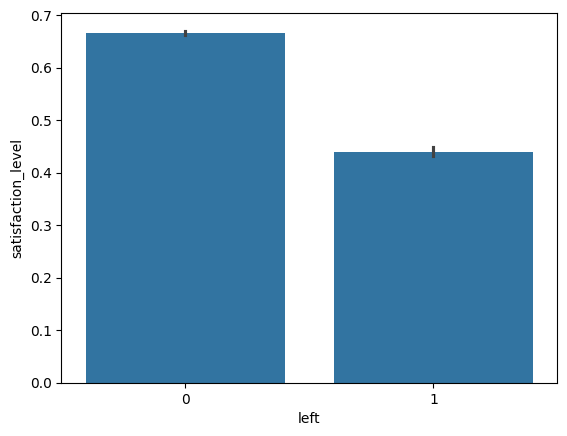

In [95]:
sns.barplot(data = df, x = 'left', y = 'satisfaction_level')

C:\Users\Ankita\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='left', ylabel='satisfaction_level'>

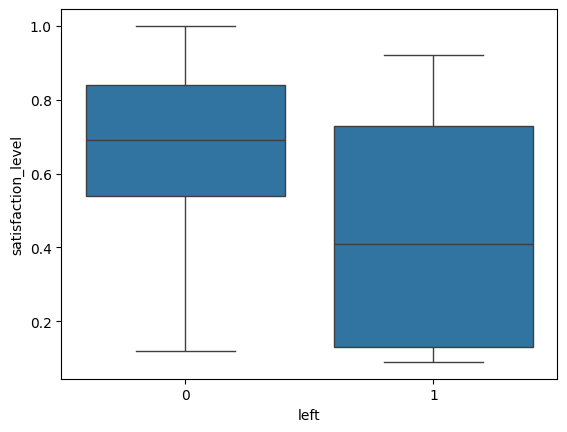

In [98]:
sns.boxplot(data = df, x = 'left', y = 'satisfaction_level')

### Building Predictive Model

In [99]:
X = df.drop(columns = ['left'])
y = df['left']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [109]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(X_train)
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [110]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [111]:
print("Ratio of workers who left in train:", y_train.sum()/y_train.count())
print("Ratio of workers who left in test:", y_test.sum()/y_test.count())

Ratio of workers who left in train: 0.24126107248309364
Ratio of workers who left in test: 0.23066666666666666


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)



[Logistic Regression] training data accuracy is : 0.763882
[Logistic Regression] test data accuracy is : 0.765556
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.976000
[KNN] training data accuracy is : 0.977807
[KNN] test data accuracy is : 0.957778
[SVM] training data accuracy is : 0.773597
[SVM] test data accuracy is : 0.779556
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.990667
[Naive Bayes] training data accuracy is : 0.799409
[Naive Bayes] test data accuracy is : 0.804222


In [114]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.7655555555555555,
 'KNN classifier': 0.9577777777777777,
 'Support Vector Machine': 0.7795555555555556,
 'Random forest': 0.9906666666666667,
 'Decision tree': 0.976,
 'Naive Bayes': 0.8042222222222222}

#### Random forest and Decision Tree have the best accuracy.

In [115]:
#Classification Report of Random forest
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.97      0.98      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [126]:
#Classification Report of Decision Tree
from sklearn.metrics import classification_report

dt_y_preds = dt.predict(X_test)

print(classification_report(y_test,dt_y_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3462
           1       0.93      0.97      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.96      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



#### Model Comparison

In [117]:
#Based on the accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.765556,0.957778,0.779556,0.990667,0.976,0.804222


<Axes: >

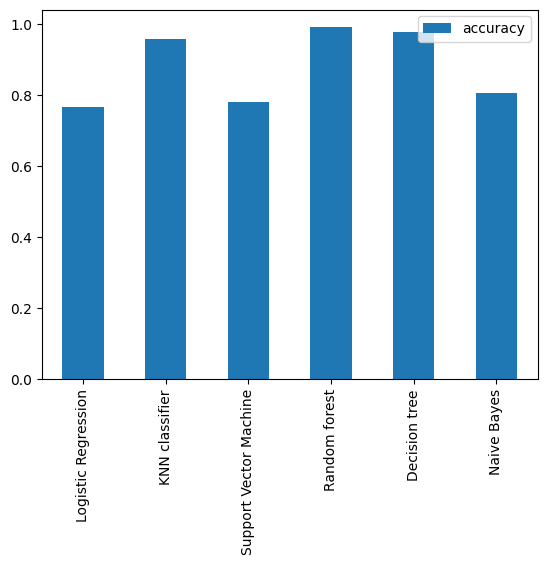

In [118]:
#Visualize the accuracy of each model
model_compare.T.plot(kind='bar') # (T is here for transpose)

#### Random Forest has 1% better accuracy than Decision Tree

### Feature importance

In [148]:
# Random Forest
importances = rm.feature_importances_
feature_dict=dict(zip(df.columns,importances))
feature_dict

{'satisfaction_level': 0.33848456464849624,
 'last_evaluation': 0.11913479223789414,
 'number_project': 0.16396543762560434,
 'average_montly_hours': 0.16089929183913582,
 'time_spend_company': 0.1902883229518499,
 'Work_accident': 0.005439952498210923,
 'left': 0.0011063623921086345,
 'promotion_last_5years': 0.013111555939805376,
 'sales': 0.007569719866894731}

<Axes: title={'center': 'Feature Importance'}>

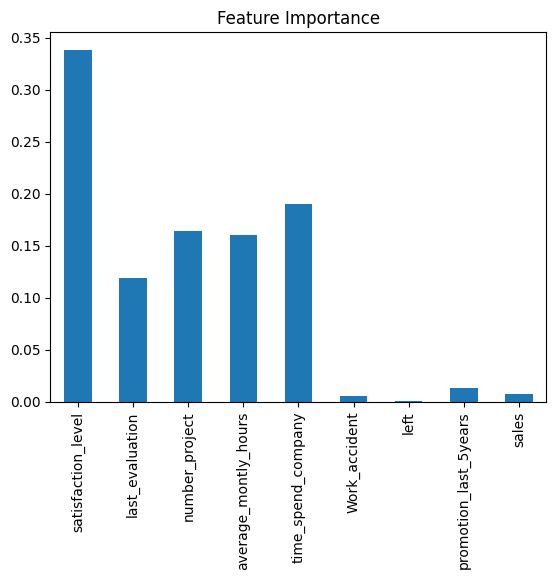

In [149]:
# Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

#### “satisfaction_level” column has the highest feature importance.